![](https://static.tacdn.com/img2/brand_refresh/Tripadvisor_lockup_horizontal_secondary_registered.svg)

El objetivo es analizar las palabras que se repiten más en función si es positivo o negativo el comentario y también por la clase de hotel.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
comentarios = pd.read_csv("tripadvisor_hotel_reviews.csv")
comentarios.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


**Número de instancias**

In [3]:
print("Nº de instancias:",comentarios.shape[0])

Nº de instancias: 20491


**Tipos de variable**

In [4]:
comentarios.dtypes

Review    object
Rating     int64
dtype: object

**¿Existen valores nulos?**

In [5]:
comentarios.isnull().sum()

Review    0
Rating    0
dtype: int64

**¿Que clases de hoteles tenemos?**

In [6]:
comentarios.Rating.unique()

array([4, 2, 3, 5, 1], dtype=int64)

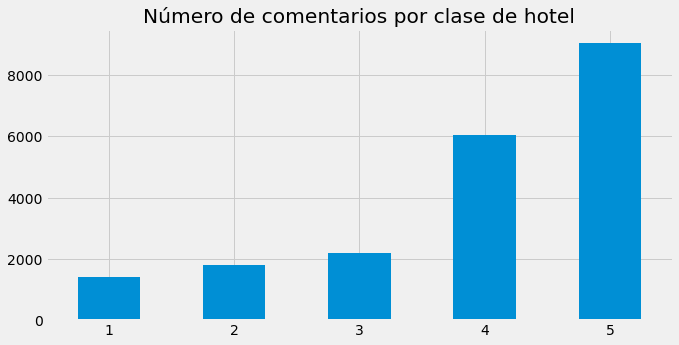

In [7]:
comentarios.Rating.value_counts(sort=False).plot.bar(figsize=(10,5),rot=0,title="Número de comentarios por clase de hotel")
plt.show()

In [8]:
comentarios.Review[102]

"absolutely charming good value stayed numerous hotels seattle characterless star chains suites westin olympic past 45 plus years, inn queen anne really stands crowd, just best value accommodation seattle, loved place, older converted brick apartment building loaded charm, enter pretty courtyard trees flowers, wonderful-smelling hallways stained-glass light fixtures wing-back chairs sprinkling antiques, rooms not large far tiny comfortable clean, standard queen, slightly larger rooms queen twin, junior suites bedroom suites, mission-style furnishings upscale expected star hotel, bath small cute pedestal sink gold mirror elegant light fixture, soaps, upscale towels not huge tremendously fluffy adequate expected, did n't use little kitchen certainly come handy lot people, room nice walk-in closet real surprise, queen-sized bed firm comfortable carpets newer clean, staff friendly accommodating free continental breakfast fresh good, parking street 10 hotel bargain seattle.i know writers co

#### Análisis de sentimiento

In [9]:
from textblob import TextBlob

In [10]:
def analisis_sentimiento(df):
    blob=TextBlob(df.Review)
    sentiment=blob.sentiment.polarity
    return sentiment

In [11]:
%%time
comentarios["SA_rank"]=comentarios.apply(analisis_sentimiento,axis=1)

Wall time: 49.3 s


In [12]:
comentarios.head(7)

,Review,Rating,SA_rank
0,nice hotel expensive parking got good deal sta...,4,0.208744
1,ok nothing special charge diamond member hilto...,2,0.214923
2,nice rooms not 4* experience hotel monaco seat...,3,0.294420
3,"unique, great stay, wonderful time hotel monac...",5,0.504825
4,"great stay great stay, went seahawk game aweso...",5,0.384615
5,love monaco staff husband stayed hotel crazy w...,5,0.243056
6,"cozy stay rainy city, husband spent 7 nights m...",5,0.366661


**Comentario más positivo**

In [13]:
cmp = comentarios.iloc[comentarios.SA_rank.idxmax]
print("Clase de hotel:",cmp.Rating)
cmp.Review

Clase de hotel: 5


'absolutely wonderful wonderful serene oasis city millions, steps away times square entering hotel peacefulness eveloping, lounge wonderful treat morning afternoon, wonderful treated meet travellers business people share experiences.loved,  '

**Comentario más negativo**

In [14]:
cmn = comentarios.iloc[comentarios.SA_rank.idxmin]
print("Clase de hotel:",cmn.Rating)
cmn.Review

Clase de hotel: 1


'worst location does say place eat sub place, make order bullet proof glass,  '

In [15]:
import seaborn as sns

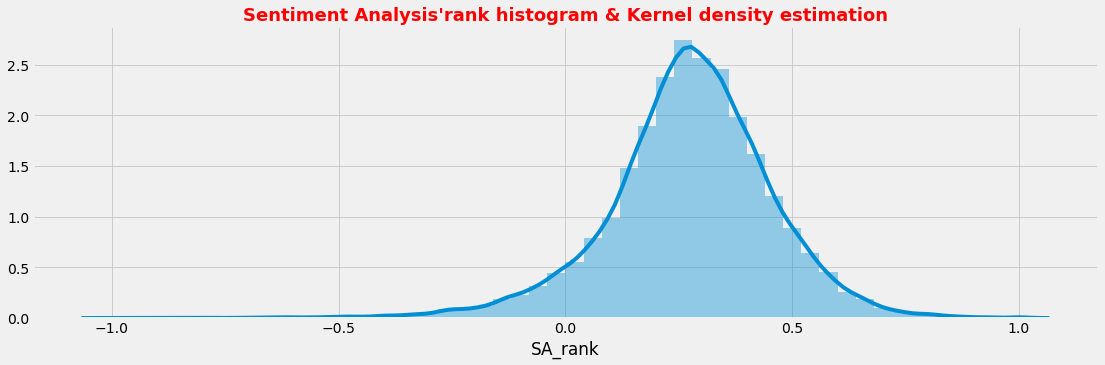

In [16]:
plt.figure(figsize=(17,5))
plt.title("Sentiment Analysis'rank histogram & Kernel density estimation",fontsize=18,color='red',fontweight="bold")
sns.distplot(comentarios.SA_rank)
plt.show()

In [17]:
comentarios["Positive_Sentiment"]=comentarios['SA_rank']>0

In [18]:
comentarios.tail()

,Review,Rating,SA_rank,Positive_Sentiment
20486,"best kept secret 3rd time staying charm, not 5...",5,0.221729,True
20487,great location price view hotel great quick pl...,4,0.503704,True
20488,"ok just looks nice modern outside, desk staff ...",2,0.171220,True
20489,hotel theft ruined vacation hotel opened sept ...,1,0.122573,True
20490,"people talking, ca n't believe excellent ratin...",2,0.110615,True


In [19]:
comentarios["Positive_Sentiment"].value_counts()

True     19112
False     1379
Name: Positive_Sentiment, dtype: int64

De cada 20 comentarios, 1 es negativo

In [20]:
resumen=comentarios.groupby("Rating").agg({"Review":np.count_nonzero,"Positive_Sentiment":np.sum})
resumen["Negative_Sentiment"]= resumen["Review"]-resumen["Positive_Sentiment"]
resumen=resumen.astype(int)
resumen.rename(columns={"Review":"Nº_Reviews"},inplace=True)
resumen

,Nº_Reviews,Positive_Sentiment,Negative_Sentiment
Rating,,,
1,1421,612,809
2,1793,1415,378
3,2184,2059,125
4,6039,5998,41
5,9054,9028,26


- En los hoteles de menores clases, se tiende a igualar la cantidad de opiniones positivas y negativas.
- En los hoteles de mayores clases prevalecen los comentarios positivos.

## Wordcloud

### Por tipo de comentarios

In [21]:
ps= comentarios[comentarios["Positive_Sentiment"]==True]
ns=  comentarios[comentarios["Positive_Sentiment"]==False]

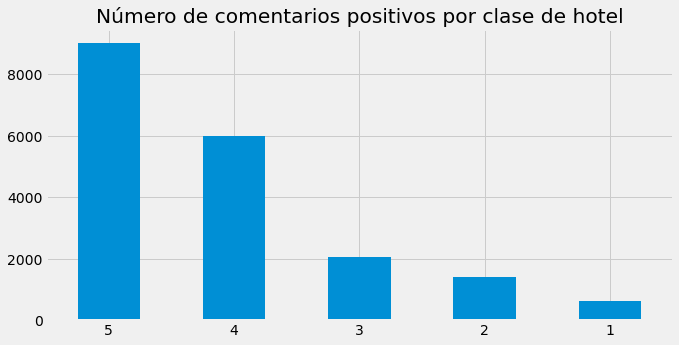

In [22]:
ps.Rating.value_counts().plot.bar(figsize=(10,5),rot=0,title="Número de comentarios positivos por clase de hotel")
plt.show()

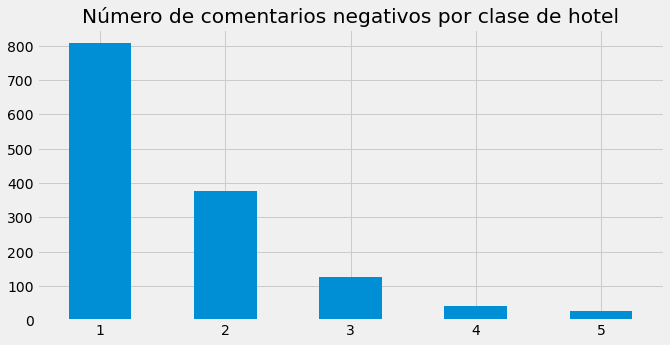

In [23]:
ns.Rating.value_counts().plot.bar(figsize=(10,5),rot=0,title="Número de comentarios negativos por clase de hotel")
plt.show()

In [24]:
def adjuntar_texto(df):
    texto=df.Review.to_list()
    texto_lista=list(filter(None,texto))
    texto_cadena=" ".join(map(str,texto_lista))
    return texto_cadena

In [25]:
ns_texto =adjuntar_texto(ns)
ps_texto =adjuntar_texto(ps)

In [26]:
from wordcloud import WordCloud, STOPWORDS
stop_w = set(STOPWORDS)
stop_w=stop_w.union({"s","room","hotel","going","day","n't"})#palabras comunes e irrelevantes
fontdict={'color':'red','size':'29','fontweight':'bold'}

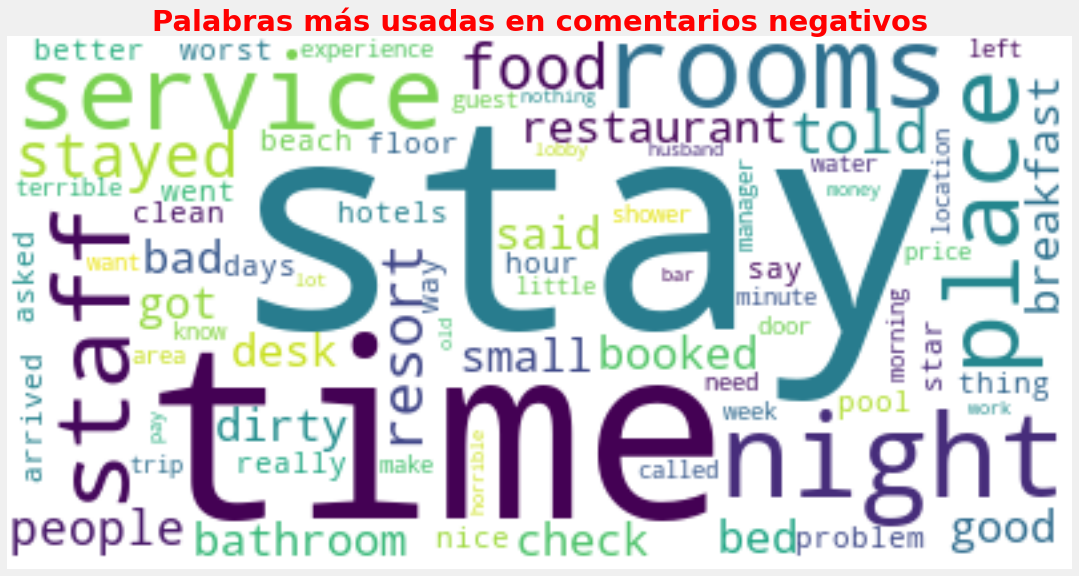

In [27]:
word_cloud = WordCloud(stopwords=stop_w,max_words=75,background_color="white").generate(ns_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios negativos",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

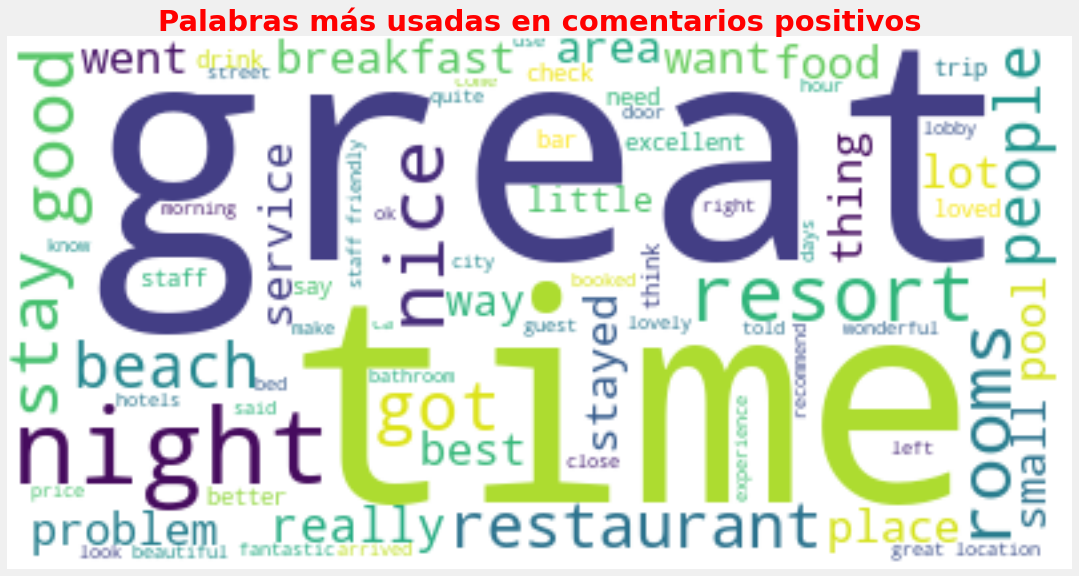

In [28]:
word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white").generate(ps_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios positivos",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

### Por clase de hotel

In [29]:
from PIL import Image

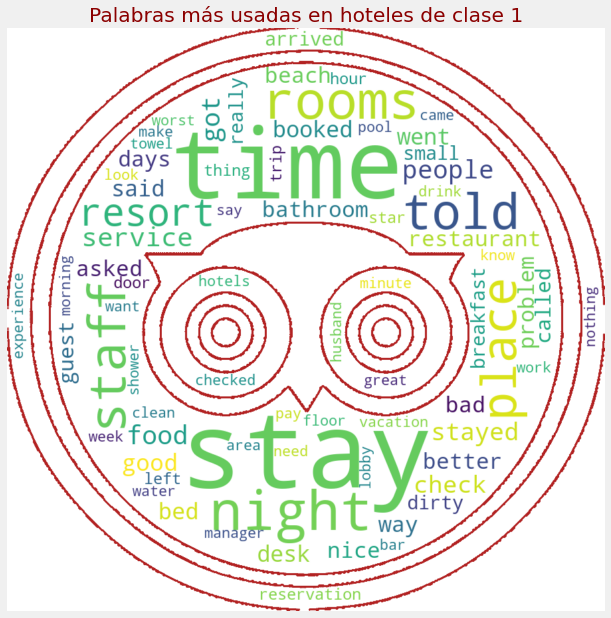

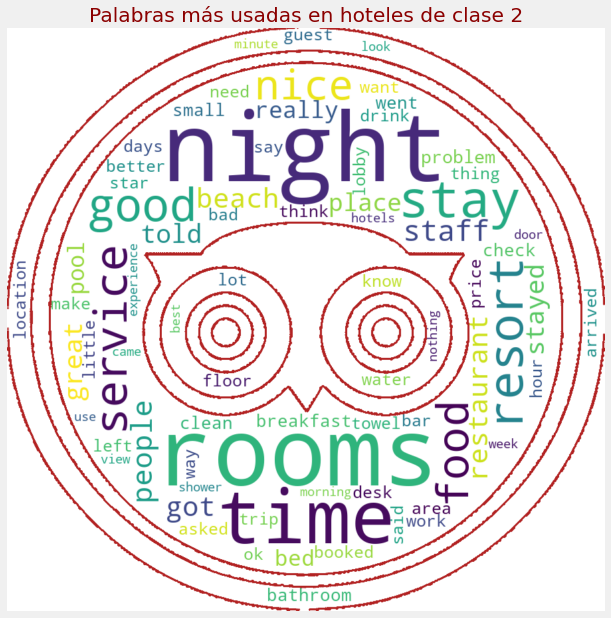

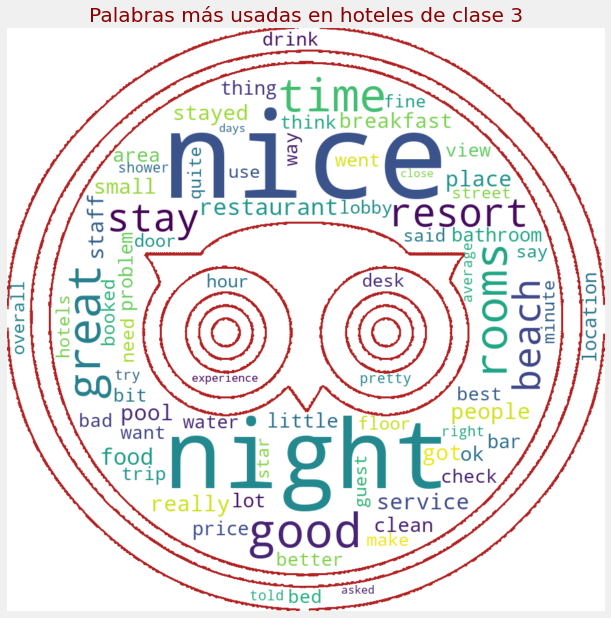

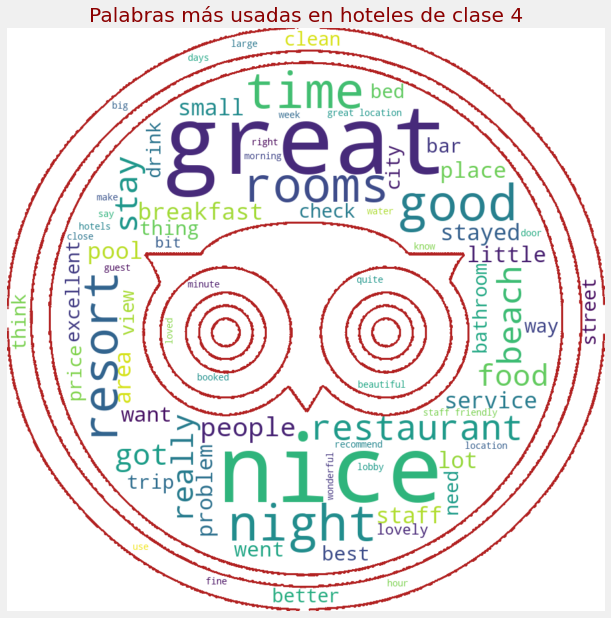

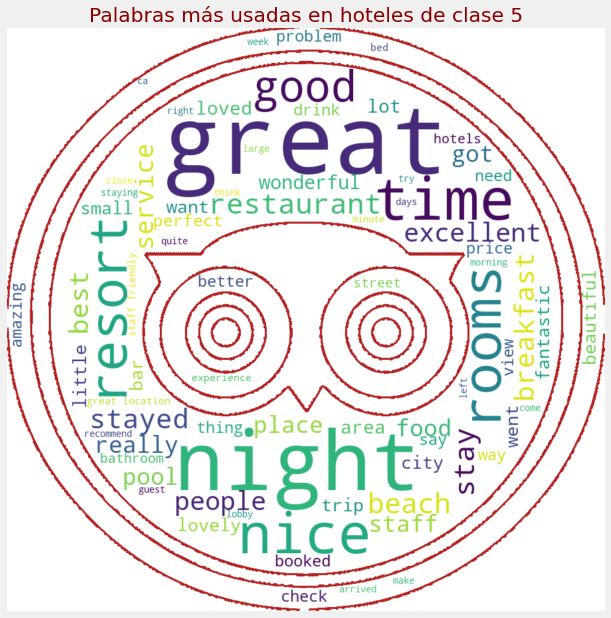

Wall time: 41.8 s


In [30]:
%%time
mask = np.array(Image.open("tripadvisor-logo.png"))
mask[(mask!=255) & (mask!=0)]=255
for i in range(1,6):
    comentarios_tipo_hotel=comentarios[comentarios["Rating"]==i]
    texto=adjuntar_texto(comentarios_tipo_hotel)
    word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white",mask=mask,
                           contour_width=3,contour_color='firebrick',max_font_size=256,random_state=1)
    word_cloud.generate(texto)
    plt.figure(figsize=(15,10))
    plt.title("Palabras más usadas en hoteles de clase {}".format(i),fontdict={'color':'darkred'})
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()